
# QCRI Arabic POS Dialect Dataset — Quick Overview

### Contains 350 manually annotated tweets per dialect in four Arabic dialects: Egyptian, Levantine, Gulf, and Maghrebi.
### Each tweet is split into a list of words (words), each word is segmented into morphemes (segments), and each segment is labeled with a Part-of-Speech (POS) tag (pos_tags).
### Tags follow a scheme that includes basic POS (noun, verb, adjective, etc.) and social media-specific tags (emoji, hashtag, mention, URL).
### Example:
### words:    ["ليه", "لما", "تحب", "حد"]
### segments: ["ليه", "لما", "تحب", "حد"]
### pos_tags: ["PART", "PART", "V", "NOUN"]
### dialect:  "egy" (Egyptian)
### Data fields:
### words, segments, pos_tags, dialect, and split info for validation.

### Purpose: Benchmark for POS tagging on real social media Arabic dialect data; useful for training and testing POS models beyond Modern Standard Arabic.

In [1]:
# Install necessary libraries (only if not already installed in your environment)
!pip install pyconll
!pip install nltk
!pip install networkx


In [2]:
import pyconll
import pandas as pd

# File paths as provided in your notebook
train_path = '/kaggle/input/ud-arabic-padt/ar_padt-ud-train.conllu'
dev_path = '/kaggle/input/ud-arabic-padt/ar_padt-ud-dev.conllu'
test_path = '/kaggle/input/ud-arabic-padt/ar_padt-ud-test.conllu'

# Load data with pyconll
train_sentences = pyconll.load_from_file(train_path)
dev_sentences = pyconll.load_from_file(dev_path)
test_sentences = pyconll.load_from_file(test_path)

## DataFrame Construction
### Each row contains a sentence as a list of tokens and its corresponding POS tags.

In [3]:
def get_df(dataset):
    samples = []
    for sentence in dataset:
        tokens = []
        pos_tags = []
        for token in sentence:
            tokens.append(token.form)
            pos_tags.append(token.upos)
        samples.append((tokens, pos_tags))
    return pd.DataFrame(samples, columns=['sent', 'pos_tags'])

# Apply to all splits
train_df = get_df(train_sentences)
dev_df   = get_df(dev_sentences)
test_df  = get_df(test_sentences)


In [4]:
df=train_df
df

,sent,pos_tags
0,"[برلين, ترفض, حصول, شركة, اميركية, على, رخصة, ...","[X, VERB, NOUN, NOUN, ADJ, ADP, NOUN, NOUN, NO..."
1,"[برلين, 15, -, 7, (, اف, ب, ), -, افادت, صحيفة...","[X, NUM, PUNCT, NUM, PUNCT, X, X, PUNCT, PUNCT..."
2,"[وفي, و, في, نيسان, /, ابريل, الماضي, ،, تخلت,...","[None, CCONJ, ADP, NOUN, PUNCT, NOUN, ADJ, PUN..."
3,"[وكانت, و, كانت, خسائر, المجموعة, الاسبانية, ا...","[None, CCONJ, VERB, NOUN, NOUN, ADJ, ADJ, VERB..."
4,"[واشارت, و, أشارت, صحيفة, الاحد, الى, ان, المس...","[None, CCONJ, VERB, NOUN, NOUN, ADP, SCONJ, NO..."
...,...,...
6070,"[تلقى, وزير, الخارجية, المصرى, احمد, ماهر, هنا...","[VERB, NOUN, NOUN, ADJ, X, X, X, X, NOUN, X, N..."
6071,"[وقالت, و, قالت, وكالة, انباء, الشرق, الاوسط, ...","[None, CCONJ, VERB, NOUN, NOUN, NOUN, ADJ, ADJ..."
6072,"[واكد, و, أكد, شعث, فى, الاتصال, على, ضرورة, ق...","[None, CCONJ, VERB, X, ADP, NOUN, ADP, NOUN, N..."
6073,"[وطالب, و, طالب, باول, اليوم, الحكومة, الفلسطي...","[None, CCONJ, VERB, X, NOUN, NOUN, ADJ, ADJ, N..."


## 1. Reading the data into a pandas dataframe

In [5]:
df.shape

(6075, 2)

In [6]:
df["sent"][0]

['برلين',
 'ترفض',
 'حصول',
 'شركة',
 'اميركية',
 'على',
 'رخصة',
 'تصنيع',
 'دبابة',
 '"',
 'ليوبارد',
 '"',
 'الالمانية']

In [7]:
df["pos_tags"][0]

['X',
 'VERB',
 'NOUN',
 'NOUN',
 'ADJ',
 'ADP',
 'NOUN',
 'NOUN',
 'NOUN',
 'PUNCT',
 'X',
 'PUNCT',
 'ADJ']

## 2. Exploring the dataset

In [8]:
df.describe()

,sent,pos_tags
count,6075,6075
unique,5958,5764
top,"[بكين, 3, مايو]","[X, NUM, NOUN]"
freq,7,51


In [9]:
df.pos_tags.value_counts()

pos_tags
[X, NUM, NOUN]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       51
[NOUN, NUM, NOUN]                                                                                                                                                                                                                                                                                                                                                                                      

In [10]:
print(len(df))

6075


In [11]:
!pip install conllu


In [12]:
import conllu
import pandas as pd

# Load PADT data in CoNLL-U format
train_path = '/kaggle/input/ud-arabic-padt/ar_padt-ud-train.conllu'
with open(train_path, 'r', encoding='utf-8') as f:
    train_data = conllu.parse(f.read())

# Extract lists of words and POS tags per sentence
def extract_sents_and_tags(conllu_sents):
    sents, tags = [], []
    for sent in conllu_sents:
        tokens = []
        pos_tags = []
        for token in sent:
            if isinstance(token['id'], int):
                tokens.append(token['form'])
                pos_tags.append(token['upostag'])
        sents.append(tokens)
        tags.append(pos_tags)
    return sents, tags

train_sents, train_tags = extract_sents_and_tags(train_data)


In [13]:
train_sents[0]


['برلين',
 'ترفض',
 'حصول',
 'شركة',
 'اميركية',
 'على',
 'رخصة',
 'تصنيع',
 'دبابة',
 '"',
 'ليوبارد',
 '"',
 'الالمانية']

In [14]:
train_tags[0]

['X',
 'VERB',
 'NOUN',
 'NOUN',
 'ADJ',
 'ADP',
 'NOUN',
 'NOUN',
 'NOUN',
 'PUNCT',
 'X',
 'PUNCT',
 'ADJ']

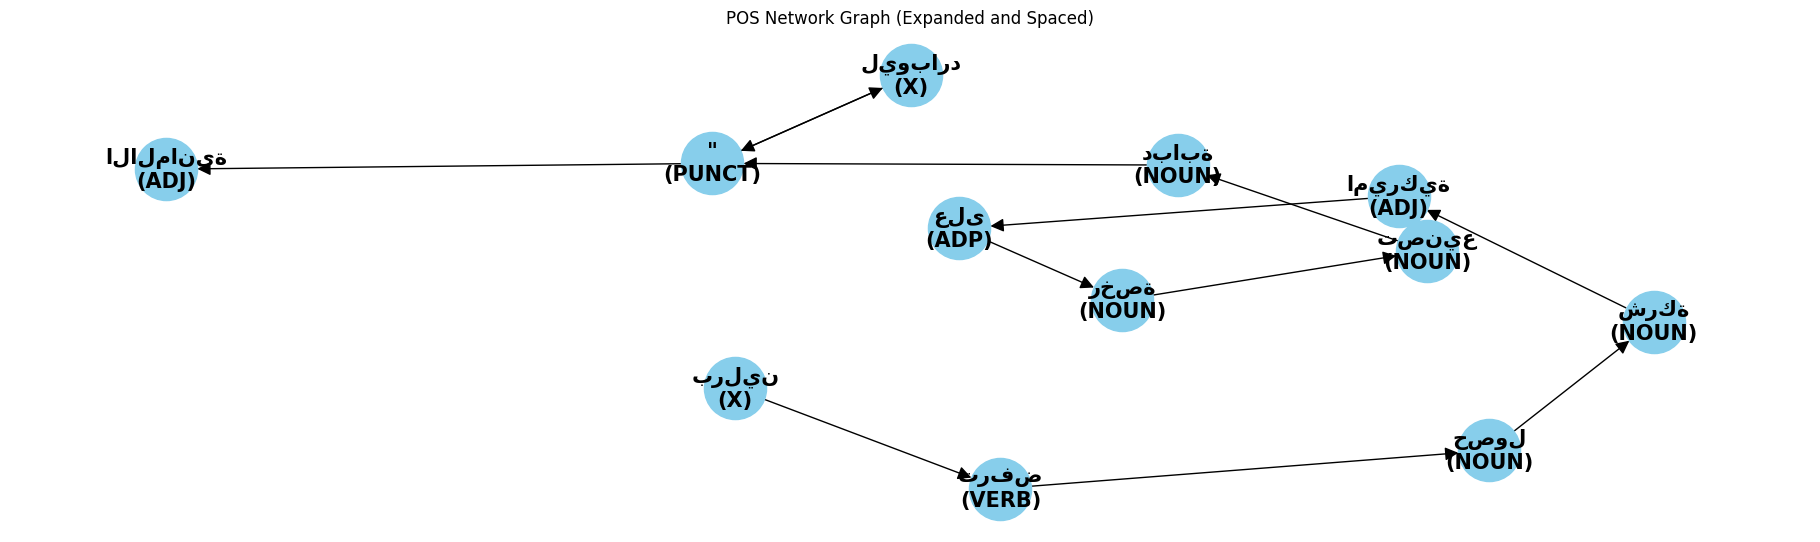

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

sentence = train_sents[0]
true_tags = train_tags[0]


G = nx.DiGraph()
for i in range(len(sentence)):
    G.add_node(sentence[i], pos=true_tags[i])
    if i > 0:
        G.add_edge(sentence[i-1], sentence[i])

labels = {node: f"{node}\n({G.nodes[node]['pos']})" for node in G.nodes()}


plt.figure(figsize=(18, 5))


pos_layout = nx.spring_layout(G, seed=1, k=2.0, iterations=200)

nx.draw(
    G,
    pos_layout,
    node_color='skyblue',
    with_labels=False,
    node_size=2000,
    arrows=True,
    arrowstyle='-|>',
    arrowsize=20
)
nx.draw_networkx_labels(G, pos_layout, labels, font_weight='bold', font_size=15)

plt.title("POS Network Graph (Expanded and Spaced)")
plt.axis('off')
plt.show()


## 2. Deep Learning (RNN / LSTM) POS Tagging Pipeline
## Preprocessing: Tokenization and Vocab Encoding

In [16]:
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, SimpleRNN
from tensorflow.keras.models import Sequential

2025-07-20 13:27:48.610358: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-20 13:27:48.610484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-20 13:27:48.780234: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
def get_numbers(df):
    # Convert tokens and POS tags to numeric representation
    vocab = set([word for sentence in df["sent"] for word in sentence])
    pos_tag_set = set([tag for tags in df["pos_tags"] for tag in tags])

    word2idx = {w: i + 1 for i, w in enumerate(vocab)}
    pos2idx = {t: i for i, t in enumerate(pos_tag_set)}
    idx2pos = {i: t for i, t in enumerate(pos_tag_set)}

    return [[word2idx[token] for token in sentence] for sentence in df["sent"]],\
           [[pos2idx[tag] for tag in tags] for tags in df["pos_tags"]], vocab, pos_tag_set

In [18]:
X, Y, vocab, pos_tag_set = get_numbers(df)
dev_X, dev_Y, _, _ = get_numbers(dev_df)
test_X, test_Y, _, _ = get_numbers(test_df)

In [19]:
X[0], Y[0]

([23470,
  3642,
  18345,
  5822,
  10004,
  27134,
  22920,
  5559,
  4381,
  3936,
  24445,
  3936,
  19717],
 [14, 16, 5, 5, 17, 15, 5, 5, 5, 7, 14, 7, 17])

#### Determine the length of the longest sentence¶


In [20]:
# Pad sequences to have same length
max_len=478

X_padded =pad_sequences(X, maxlen=max_len, padding='post')
Y_padded =pad_sequences(Y, maxlen=max_len, padding='post')

dev_X_padded=pad_sequences(dev_X, maxlen=max_len, padding='post')
dev_Y_padded = pad_sequences(dev_Y, maxlen=max_len, padding='post')

test_X_padded=pad_sequences(test_X, maxlen=max_len, padding='post') 
test_Y_padded=pad_sequences(test_Y, maxlen=max_len, padding='post')

In [21]:
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)

### RNN

In [22]:
# Build RNN model
model = Sequential([
        Embedding(input_dim=len(vocab) + 1, output_dim=8),
        SimpleRNN(16, return_sequences=True),
        Dense(len(pos_tag_set), activation='softmax')
    ])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_padded, Y_padded, epochs=2, batch_size=64)

Epoch 1/2
 3/95 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.1067 - loss: 2.7079

I0000 00:00:1753018086.100685      95 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1753018086.156079      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


95/95 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.8343 - loss: 1.3722
Epoch 2/2
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9432 - loss: 0.3138


In [23]:
evaluate_model(model, dev_X_padded, dev_Y_padded)
evaluate_model(model, test_X_padded, test_Y_padded)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9443 - loss: 0.2470
Test Loss: 0.25446489453315735
Test Accuracy: 0.9427367448806763
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9223 - loss: 0.3327
Test Loss: 0.3078235983848572
Test Accuracy: 0.928661048412323


### LSTM

I tried simple LSTM models with variant hyper-parameters -including #nodes, batch_size, and #epochs- and  the best that I got was 79.69% training accuracy 81.92% dev accuracy and 69.09% test accuracy<br>
I tried the same simple LSTM models with variant hyper-parameters and the best that I got was 91.58% training accuracy 92.39% dev accuracy and 90.46% test accuracy.<br> 
The only difference between the first batch of experiments and the second ones was the `maxlen` provided to the `pad_sequences` function, as in the first no.of experiments `maxlen = 150` and in the second batch of experiments  `maxlen = 478` where 478 is the length of the biggest sequence in the training dataset.

In [24]:
# Build LSTM model
model = Sequential([
        Embedding(input_dim=len(vocab) + 1, output_dim=16),
        LSTM(32, return_sequences=True),
        Dense(len(pos_tag_set), activation='softmax')
    ])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_padded, Y_padded, epochs=2, batch_size=64)

Epoch 1/2
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8666 - loss: 1.0166
Epoch 2/2
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9353 - loss: 0.2371


In [25]:
evaluate_model(model, dev_X_padded, dev_Y_padded)
evaluate_model(model, test_X_padded, test_Y_padded)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9448 - loss: 0.1941
Test Loss: 0.2000492513179779
Test Accuracy: 0.9432615041732788
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9242 - loss: 0.3021
Test Loss: 0.2768779993057251
Test Accuracy: 0.930500864982605
